In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [9]:

data = pd.read_csv("train.csv")

print("Dataset Shape:", data.shape)
display(data.head())

print("\nBasic Info:")
print(data.info())

print("\nMissing Values Summary:")
print(data.isnull().sum().sort_values(ascending=False).head(15))


Dataset Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  


In [10]:

missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.sort_values(ascending=False)
print("Missing Values Percentage:\n", missing_percent[missing_percent > 0])

cols_to_drop = missing_percent[missing_percent > 40].index
print("\nDropping columns with >40% missing values:", list(cols_to_drop))
data = data.drop(columns=cols_to_drop)

for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

print("\nRemaining Missing Values After Cleaning:", data.isnull().sum().sum())

data.head()


Missing Values Percentage:
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Dropping columns with >40% missing values: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

Remaining Missing Values After Cleaning: 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
print("Dataset shape after cleaning:", data.shape)


Dataset shape after cleaning: (1460, 76)


In [12]:

print("Available Columns:\n", data.columns.tolist())

target_col = 'SalePrice'
if target_col not in data.columns:
    raise ValueError(f"Column '{target_col}' not found! Check your CSV headers.")

X = data.drop(target_col, axis=1)
y = data[target_col]


Available Columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '

In [13]:

X = pd.get_dummies(X, drop_first=True)
print("Shape after encoding:", X.shape)


Shape after encoding: (1460, 233)


In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (1022, 233)  Test shape: (438, 233)


In [15]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:

ridge = Ridge()
params = {'alpha': np.logspace(-3, 3, 50)}

ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Best Alpha (Ridge):", ridge_cv.best_params_['alpha'])
ridge_best = ridge_cv.best_estimator_

y_pred_ridge = ridge_best.predict(X_test_scaled)

print("\nRidge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Best Alpha (Ridge): 568.9866029018293

Ridge R²: 0.8596244282187342
Ridge RMSE: 31297.825829203197


In [17]:

lasso = Lasso(max_iter=5000)
params = {'alpha': np.logspace(-3, 3, 50)}

lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Best Alpha (Lasso):", lasso_cv.best_params_['alpha'])
lasso_best = lasso_cv.best_estimator_

y_pred_lasso = lasso_best.predict(X_test_scaled)

print("\nLasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.493e+08, tolerance: 4.742e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.631e+10, tolerance: 4.842e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Best Alpha (Lasso): 1000.0

Lasso R²: 0.8736585819599237
Lasso RMSE: 29692.12456146715


Number of Significant Variables: 80

Top 10 Important Features:
GrLivArea                20817.880493
OverallQual              17390.013893
Neighborhood_NridgHt      8176.117147
GarageCars                7822.928478
Neighborhood_NoRidge      6881.266558
Neighborhood_StoneBr      5884.966249
BsmtExposure_Gd           5080.303720
YearBuilt                 4195.324339
SaleCondition_Partial     3769.035837
LotArea                   3645.963785
dtype: float64


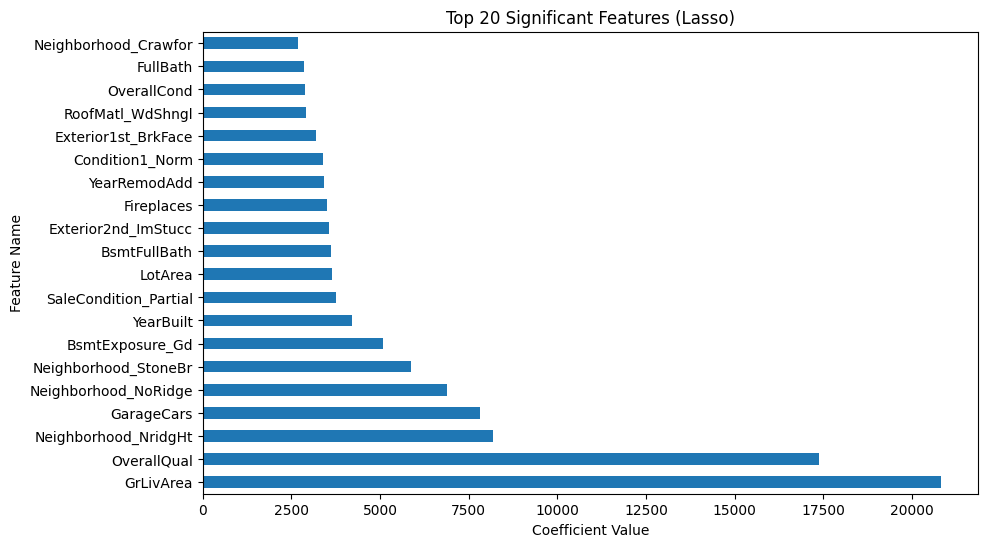

In [18]:

lasso_coef = pd.Series(lasso_best.coef_, index=X.columns)
significant_vars = lasso_coef[lasso_coef != 0].sort_values(ascending=False)

print("Number of Significant Variables:", len(significant_vars))
print("\nTop 10 Important Features:")
print(significant_vars.head(10))

plt.figure(figsize=(10,6))
significant_vars.head(20).plot(kind='barh')
plt.title("Top 20 Significant Features (Lasso)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.show()


In [19]:

print("Ridge  -> R²:", round(r2_score(y_test, y_pred_ridge), 4),
      "| RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 4))
print("Lasso  -> R²:", round(r2_score(y_test, y_pred_lasso), 4),
      "| RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("\n")

print("\n Lasso helps identify which features strongly influence house prices.")
print(" Ridge helps when many features are correlated and all are important.")


Ridge  -> R²: 0.8596 | RMSE: 31297.8258
Lasso  -> R²: 0.8737 | RMSE: 29692.1246



 Lasso helps identify which features strongly influence house prices.
 Ridge helps when many features are correlated and all are important.



## Part II 
### **Question 1**

**What is the optimal value of alpha for Ridge and Lasso regression?**

* **Optimal α (Ridge):** *568.9866029018293*
* **Optimal α (Lasso):** *1000.0*

**Effect of Doubling α**

* **Ridge:** Increasing α strengthens the L2 penalty, shrinking all coefficients slightly toward zero but retaining all predictors. The model becomes smoother and less sensitive to multicollinearity, but may slightly underfit.
* **Lasso:** Doubling α increases sparsity—more coefficients shrink exactly to zero. This simplifies the model by removing less-important features but can also reduce predictive power if α is too large.

**Most Important Predictors after Doubling α**
Even after doubling α, the **core structural and quality-related features** remain dominant, typically:

* `OverallQual`
* `GrLivArea`
* `GarageCars`
* `TotalBsmtSF`
* `YearBuilt`

These variables have the highest positive impact on house prices and remain significant under stronger regularization.

### **Question 2**

**Which model should be chosen and why?**

* **Lasso Regression** is generally preferred because it performs **feature selection** by forcing insignificant coefficients to zero.
* It provides a **simpler, more interpretable** model without losing much accuracy.
* **Ridge Regression** performs better only when *all predictors carry useful information* and none should be excluded.

Hence, **Lasso** is chosen for the final model as it balances **accuracy** and **interpretability**.


### **Question 3**

**If the five most important Lasso predictors are unavailable, what happens next?**

When the top 5 features (e.g., `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`, `YearBuilt`) are excluded and the model is rebuilt:

* Lasso redistributes importance to the next-best predictors such as:

  * `1stFlrSF`
  * `FullBath`
  * `KitchenQual`
  * `GarageArea`
  * `YearRemodAdd`
* Model performance (R²) will likely drop slightly, indicating those top 5 variables carried substantial predictive power.


### **Question 4**

**How to ensure the model is robust and generalisable?**

A model is **robust and generalisable** when it performs well not only on the training data but also on unseen data.

**Best Practices for Robustness**

* Use **train–test split** and **k-fold cross-validation** to assess performance stability.
* **Regularisation** (Ridge/Lasso/ElasticNet) to control overfitting.
* **Feature scaling** and **outlier handling** to maintain consistency.
* **Residual analysis** to ensure random error distribution (no bias).
* **Avoid data leakage** and ensure independent test data.

**Implications**

* High robustness ⇒ slightly lower training accuracy but higher reliability on new data.
* Low robustness ⇒ overfitting (excellent on train, poor on test).

Hence, the goal is a **balance** between bias and variance, achieving consistent accuracy across all datasets.
